In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [2]:
import os
import pandas as pd
from termcolor import colored
import numpy as np
from collections import OrderedDict
from collections import Counter
import matplotlib.pyplot as plt
from natsort import natsorted
import sys
import pickle
import seaborn as sns

# Display pandas df without truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

np.set_printoptions(edgeitems=30, linewidth=100000, formatter=dict(float=lambda x: "%.3g" % x))



## Simple boxplot func

In [3]:
green_diamond = dict(markerfacecolor='g', marker='D')

def simple_boxplot(my_dict, fig_name, save_flag):
    fig, ax = plt.subplots(figsize=(20, 5), dpi=80)
    ax.boxplot(my_dict.values(), flierprops=green_diamond)
    ax.set_xticklabels(my_dict.keys())
    ax.grid()
    plt.ylim(-1)
    plt.tight_layout()
    if save_flag:
        plt.savefig(fig_name+'.png')

In [4]:
num_robot = 24
experiment_time = 1800
num_run = 100

In [26]:
# results_folder = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results/persistent/TimeoutRespawnExp_2021-06-30_BLUE'
# results_folder = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results/persistent/TimeoutRespawnExp_2021-06-30_RED'
# results_folder = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results/persistent/TimeoutRespawnExp_2021-06-30_MIXED'
results_folder = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results/brownian/TimeoutRespawnExp_2021-07-06_robots#24_MIXED'
# results_folder = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results/brownian/TimeoutRespawnExp_2021-07-07_robots#24_RED'
# results_folder = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results/brownian/TimeoutRespawnExp_2021-07-07_robots#24_BLUE'

In [27]:
if not os.path.isdir(results_folder):
    print(colored("Error, " + results_folder + " does not exist", 'red'))
else:
    print(colored("OK, " + results_folder + " exists", 'green'))

OK, /home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results/brownian/TimeoutRespawnExp_2021-07-06_robots#24_MIXED exists


In [28]:
completed_task_label = ["time", "areaID", "creation_time", "completion_time", "type", "kID_on_top", "kIDs"]

## Completed areas per kilobot

In [15]:
completed_task_dict = {}

timeout = -1
respawn = -1
for timeout_folder in natsorted(os.listdir(os.path.join(results_folder))):
    print(colored("Timeout folder:", 'blue'),timeout_folder)
    
    parameters = timeout_folder.split("_")
    
    for param in parameters:
        if param.startswith("timeout"):
            print(param.split("#")[-1])
            timeout = int(param.split("#")[-1]) * 10
            print("\ttimeout:",timeout)
        elif param.startswith("respawn"):
#           print(param.split("#")[-1])
            respawn = int(param.split("#")[-1])
            print("\trespawn:",respawn)
    
#     if timeout == 20 :
#         break
        
    if timeout == -1 :
        print(colored("\tWARNING: wrong timeout folder", 'green'))
        continue
    if respawn == -1 :
        print(colored("\tWARNING: wrong timeout folder", 'green'))
        continue

    completed_task_count = []
    for filename in os.listdir(os.path.join(results_folder, timeout_folder)):
        if filename.endswith("completed_taskLOG.tsv"):
            if not os.path.getsize(os.path.join(results_folder, timeout_folder, filename)) > 0:
                print(colored("\tWARNING, empty file at:" + filename, 'red'))
                continue
            print('\tfilename: ', filename)
            
            df_completedTask = pd.read_csv(os.path.join(results_folder, timeout_folder, filename), sep="\t", header=None)
            df_completedTask.columns = completed_task_label
            completed_area_kIDs = np.array([]).astype(int)
            for area in df_completedTask["kIDs"].values:
            #     print(np.fromstring(area, dtype=int, sep=','))
                completed_area_kIDs = np.append(completed_area_kIDs, np.fromstring(area, dtype=int, sep=','))
            counter = Counter(completed_area_kIDs)
            
            for i in np.arange(num_robot):
                if i not in counter.keys():
#                     print(i)
                    counter[i] = 0
                    
            completed_task_count += list(counter.values())
#             print(elapsed_timeout_count)
    
    if len(completed_task_count):
        completed_task_dict[str(timeout)+","+str(respawn)] = completed_task_count
    else:
        print(colored("\tWARNING: empty list!!", 'green'))
        completed_task_dict[str(timeout)+","+str(respawn)] = [0] * num_robot * num_run
            


Timeout folder: TimeoutRespawnExp_2021-07-07_robots#24_timeout#1_respawn#10_NumAreas#16_redAreas#0_1800#seconds
1
	timeout: 10
	respawn: 10
	filename:  seed#31_completed_taskLOG.tsv
	filename:  seed#13_completed_taskLOG.tsv
	filename:  seed#27_completed_taskLOG.tsv
	filename:  seed#19_completed_taskLOG.tsv
	filename:  seed#88_completed_taskLOG.tsv
	filename:  seed#23_completed_taskLOG.tsv
	filename:  seed#3_completed_taskLOG.tsv
	filename:  seed#59_completed_taskLOG.tsv
	filename:  seed#79_completed_taskLOG.tsv
	filename:  seed#12_completed_taskLOG.tsv
	filename:  seed#32_completed_taskLOG.tsv
	filename:  seed#45_completed_taskLOG.tsv
	filename:  seed#94_completed_taskLOG.tsv
	filename:  seed#52_completed_taskLOG.tsv
	filename:  seed#20_completed_taskLOG.tsv
	filename:  seed#39_completed_taskLOG.tsv
	filename:  seed#80_completed_taskLOG.tsv
	filename:  seed#66_completed_taskLOG.tsv
	filename:  seed#98_completed_taskLOG.tsv
	filename:  seed#41_completed_taskLOG.tsv
	filename:  seed#34_c

	filename:  seed#16_completed_taskLOG.tsv
	filename:  seed#15_completed_taskLOG.tsv
	filename:  seed#8_completed_taskLOG.tsv
	filename:  seed#4_completed_taskLOG.tsv
	filename:  seed#11_completed_taskLOG.tsv
	filename:  seed#46_completed_taskLOG.tsv
	filename:  seed#85_completed_taskLOG.tsv
	filename:  seed#44_completed_taskLOG.tsv
	filename:  seed#92_completed_taskLOG.tsv
	filename:  seed#42_completed_taskLOG.tsv
	filename:  seed#75_completed_taskLOG.tsv
	filename:  seed#1_completed_taskLOG.tsv
	filename:  seed#48_completed_taskLOG.tsv
	filename:  seed#54_completed_taskLOG.tsv
	filename:  seed#72_completed_taskLOG.tsv
	filename:  seed#9_completed_taskLOG.tsv
	filename:  seed#29_completed_taskLOG.tsv
	filename:  seed#100_completed_taskLOG.tsv
	filename:  seed#57_completed_taskLOG.tsv
	filename:  seed#43_completed_taskLOG.tsv
	filename:  seed#99_completed_taskLOG.tsv
	filename:  seed#38_completed_taskLOG.tsv
	filename:  seed#28_completed_taskLOG.tsv
	filename:  seed#68_completed_taskLOG

	filename:  seed#49_completed_taskLOG.tsv
	filename:  seed#2_completed_taskLOG.tsv
	filename:  seed#76_completed_taskLOG.tsv
	filename:  seed#83_completed_taskLOG.tsv
	filename:  seed#71_completed_taskLOG.tsv
	filename:  seed#96_completed_taskLOG.tsv
	filename:  seed#81_completed_taskLOG.tsv
	filename:  seed#84_completed_taskLOG.tsv
	filename:  seed#95_completed_taskLOG.tsv
	filename:  seed#60_completed_taskLOG.tsv
	filename:  seed#17_completed_taskLOG.tsv
	filename:  seed#37_completed_taskLOG.tsv
	filename:  seed#40_completed_taskLOG.tsv
	filename:  seed#26_completed_taskLOG.tsv
	filename:  seed#18_completed_taskLOG.tsv
	filename:  seed#33_completed_taskLOG.tsv
	filename:  seed#89_completed_taskLOG.tsv
	filename:  seed#69_completed_taskLOG.tsv
Timeout folder: TimeoutRespawnExp_2021-07-07_robots#24_timeout#2_respawn#30_NumAreas#16_redAreas#0_1800#seconds
2
	timeout: 20
	respawn: 30
	filename:  seed#31_completed_taskLOG.tsv
	filename:  seed#13_completed_taskLOG.tsv
	filename:  seed#27_c

	filename:  seed#41_completed_taskLOG.tsv
	filename:  seed#34_completed_taskLOG.tsv
	filename:  seed#10_completed_taskLOG.tsv
	filename:  seed#35_completed_taskLOG.tsv
	filename:  seed#58_completed_taskLOG.tsv
	filename:  seed#62_completed_taskLOG.tsv
	filename:  seed#14_completed_taskLOG.tsv
	filename:  seed#21_completed_taskLOG.tsv
	filename:  seed#73_completed_taskLOG.tsv
	filename:  seed#22_completed_taskLOG.tsv
	filename:  seed#30_completed_taskLOG.tsv
	filename:  seed#53_completed_taskLOG.tsv
	filename:  seed#50_completed_taskLOG.tsv
	filename:  seed#77_completed_taskLOG.tsv
	filename:  seed#63_completed_taskLOG.tsv
	filename:  seed#97_completed_taskLOG.tsv
	filename:  seed#90_completed_taskLOG.tsv
	filename:  seed#16_completed_taskLOG.tsv
	filename:  seed#15_completed_taskLOG.tsv
	filename:  seed#8_completed_taskLOG.tsv
	filename:  seed#4_completed_taskLOG.tsv
	filename:  seed#11_completed_taskLOG.tsv
	filename:  seed#46_completed_taskLOG.tsv
	filename:  seed#85_completed_taskLO

	filename:  seed#50_completed_taskLOG.tsv
	filename:  seed#77_completed_taskLOG.tsv
	filename:  seed#63_completed_taskLOG.tsv
	filename:  seed#97_completed_taskLOG.tsv
	filename:  seed#90_completed_taskLOG.tsv
	filename:  seed#16_completed_taskLOG.tsv
	filename:  seed#15_completed_taskLOG.tsv
	filename:  seed#8_completed_taskLOG.tsv
	filename:  seed#4_completed_taskLOG.tsv
	filename:  seed#11_completed_taskLOG.tsv
	filename:  seed#46_completed_taskLOG.tsv
	filename:  seed#85_completed_taskLOG.tsv
	filename:  seed#44_completed_taskLOG.tsv
	filename:  seed#92_completed_taskLOG.tsv
	filename:  seed#42_completed_taskLOG.tsv
	filename:  seed#75_completed_taskLOG.tsv
	filename:  seed#1_completed_taskLOG.tsv
	filename:  seed#48_completed_taskLOG.tsv
	filename:  seed#54_completed_taskLOG.tsv
	filename:  seed#72_completed_taskLOG.tsv
	filename:  seed#9_completed_taskLOG.tsv
	filename:  seed#29_completed_taskLOG.tsv
	filename:  seed#100_completed_taskLOG.tsv
	filename:  seed#57_completed_taskLOG

	filename:  seed#81_completed_taskLOG.tsv
	filename:  seed#84_completed_taskLOG.tsv
	filename:  seed#95_completed_taskLOG.tsv
	filename:  seed#60_completed_taskLOG.tsv
	filename:  seed#17_completed_taskLOG.tsv
	filename:  seed#37_completed_taskLOG.tsv
	filename:  seed#40_completed_taskLOG.tsv
	filename:  seed#26_completed_taskLOG.tsv
	filename:  seed#18_completed_taskLOG.tsv
	filename:  seed#33_completed_taskLOG.tsv
	filename:  seed#89_completed_taskLOG.tsv
	filename:  seed#69_completed_taskLOG.tsv
Timeout folder: TimeoutRespawnExp_2021-07-07_robots#24_timeout#6_respawn#10_NumAreas#16_redAreas#0_1800#seconds
6
	timeout: 60
	respawn: 10
	filename:  seed#31_completed_taskLOG.tsv
	filename:  seed#13_completed_taskLOG.tsv
	filename:  seed#27_completed_taskLOG.tsv
	filename:  seed#19_completed_taskLOG.tsv
	filename:  seed#88_completed_taskLOG.tsv
	filename:  seed#23_completed_taskLOG.tsv
	filename:  seed#3_completed_taskLOG.tsv
	filename:  seed#59_completed_taskLOG.tsv
	filename:  seed#79_c

	filename:  seed#76_completed_taskLOG.tsv
	filename:  seed#83_completed_taskLOG.tsv
	filename:  seed#71_completed_taskLOG.tsv
	filename:  seed#96_completed_taskLOG.tsv
	filename:  seed#81_completed_taskLOG.tsv
	filename:  seed#84_completed_taskLOG.tsv
	filename:  seed#95_completed_taskLOG.tsv
	filename:  seed#60_completed_taskLOG.tsv
	filename:  seed#17_completed_taskLOG.tsv
	filename:  seed#37_completed_taskLOG.tsv
	filename:  seed#40_completed_taskLOG.tsv
	filename:  seed#26_completed_taskLOG.tsv
	filename:  seed#18_completed_taskLOG.tsv
	filename:  seed#33_completed_taskLOG.tsv
	filename:  seed#89_completed_taskLOG.tsv
	filename:  seed#69_completed_taskLOG.tsv
Timeout folder: TimeoutRespawnExp_2021-07-07_robots#24_timeout#6_respawn#60_NumAreas#16_redAreas#0_1800#seconds
6
	timeout: 60
	respawn: 60
	filename:  seed#31_completed_taskLOG.tsv
	filename:  seed#13_completed_taskLOG.tsv
	filename:  seed#27_completed_taskLOG.tsv
	filename:  seed#19_completed_taskLOG.tsv
	filename:  seed#88_

	filename:  seed#62_completed_taskLOG.tsv
	filename:  seed#14_completed_taskLOG.tsv
	filename:  seed#21_completed_taskLOG.tsv
	filename:  seed#73_completed_taskLOG.tsv
	filename:  seed#22_completed_taskLOG.tsv
	filename:  seed#30_completed_taskLOG.tsv
	filename:  seed#53_completed_taskLOG.tsv
	filename:  seed#50_completed_taskLOG.tsv
	filename:  seed#77_completed_taskLOG.tsv
	filename:  seed#63_completed_taskLOG.tsv
	filename:  seed#97_completed_taskLOG.tsv
	filename:  seed#90_completed_taskLOG.tsv
	filename:  seed#16_completed_taskLOG.tsv
	filename:  seed#15_completed_taskLOG.tsv
	filename:  seed#8_completed_taskLOG.tsv
	filename:  seed#4_completed_taskLOG.tsv
	filename:  seed#11_completed_taskLOG.tsv
	filename:  seed#46_completed_taskLOG.tsv
	filename:  seed#85_completed_taskLOG.tsv
	filename:  seed#44_completed_taskLOG.tsv
	filename:  seed#92_completed_taskLOG.tsv
	filename:  seed#42_completed_taskLOG.tsv
	filename:  seed#75_completed_taskLOG.tsv
	filename:  seed#1_completed_taskLOG

	filename:  seed#21_completed_taskLOG.tsv
	filename:  seed#73_completed_taskLOG.tsv
	filename:  seed#22_completed_taskLOG.tsv
	filename:  seed#30_completed_taskLOG.tsv
	filename:  seed#53_completed_taskLOG.tsv
	filename:  seed#50_completed_taskLOG.tsv
	filename:  seed#77_completed_taskLOG.tsv
	filename:  seed#63_completed_taskLOG.tsv
	filename:  seed#97_completed_taskLOG.tsv
	filename:  seed#90_completed_taskLOG.tsv
	filename:  seed#16_completed_taskLOG.tsv
	filename:  seed#15_completed_taskLOG.tsv
	filename:  seed#8_completed_taskLOG.tsv
	filename:  seed#4_completed_taskLOG.tsv
	filename:  seed#11_completed_taskLOG.tsv
	filename:  seed#46_completed_taskLOG.tsv
	filename:  seed#85_completed_taskLOG.tsv
	filename:  seed#44_completed_taskLOG.tsv
	filename:  seed#92_completed_taskLOG.tsv
	filename:  seed#42_completed_taskLOG.tsv
	filename:  seed#75_completed_taskLOG.tsv
	filename:  seed#1_completed_taskLOG.tsv
	filename:  seed#48_completed_taskLOG.tsv
	filename:  seed#54_completed_taskLOG

	filename:  seed#28_completed_taskLOG.tsv
	filename:  seed#68_completed_taskLOG.tsv
	filename:  seed#6_completed_taskLOG.tsv
	filename:  seed#56_completed_taskLOG.tsv
	filename:  seed#51_completed_taskLOG.tsv
	filename:  seed#5_completed_taskLOG.tsv
	filename:  seed#86_completed_taskLOG.tsv
	filename:  seed#91_completed_taskLOG.tsv
	filename:  seed#64_completed_taskLOG.tsv
	filename:  seed#87_completed_taskLOG.tsv
	filename:  seed#7_completed_taskLOG.tsv
	filename:  seed#74_completed_taskLOG.tsv
	filename:  seed#67_completed_taskLOG.tsv
	filename:  seed#24_completed_taskLOG.tsv
	filename:  seed#82_completed_taskLOG.tsv
	filename:  seed#36_completed_taskLOG.tsv
	filename:  seed#70_completed_taskLOG.tsv
	filename:  seed#65_completed_taskLOG.tsv
	filename:  seed#93_completed_taskLOG.tsv
	filename:  seed#47_completed_taskLOG.tsv
	filename:  seed#78_completed_taskLOG.tsv
	filename:  seed#61_completed_taskLOG.tsv
	filename:  seed#55_completed_taskLOG.tsv
	filename:  seed#25_completed_taskLOG

	filename:  seed#91_completed_taskLOG.tsv
	filename:  seed#64_completed_taskLOG.tsv
	filename:  seed#87_completed_taskLOG.tsv
	filename:  seed#7_completed_taskLOG.tsv
	filename:  seed#74_completed_taskLOG.tsv
	filename:  seed#67_completed_taskLOG.tsv
	filename:  seed#24_completed_taskLOG.tsv
	filename:  seed#82_completed_taskLOG.tsv
	filename:  seed#36_completed_taskLOG.tsv
	filename:  seed#70_completed_taskLOG.tsv
	filename:  seed#65_completed_taskLOG.tsv
	filename:  seed#93_completed_taskLOG.tsv
	filename:  seed#47_completed_taskLOG.tsv
	filename:  seed#78_completed_taskLOG.tsv
	filename:  seed#61_completed_taskLOG.tsv
	filename:  seed#55_completed_taskLOG.tsv
	filename:  seed#25_completed_taskLOG.tsv
	filename:  seed#49_completed_taskLOG.tsv
	filename:  seed#2_completed_taskLOG.tsv
	filename:  seed#76_completed_taskLOG.tsv
	filename:  seed#83_completed_taskLOG.tsv
	filename:  seed#71_completed_taskLOG.tsv
	filename:  seed#96_completed_taskLOG.tsv
	filename:  seed#81_completed_taskLO

	filename:  seed#55_completed_taskLOG.tsv
	filename:  seed#25_completed_taskLOG.tsv
	filename:  seed#49_completed_taskLOG.tsv
	filename:  seed#2_completed_taskLOG.tsv
	filename:  seed#76_completed_taskLOG.tsv
	filename:  seed#83_completed_taskLOG.tsv
	filename:  seed#71_completed_taskLOG.tsv
	filename:  seed#96_completed_taskLOG.tsv
	filename:  seed#81_completed_taskLOG.tsv
	filename:  seed#84_completed_taskLOG.tsv
	filename:  seed#95_completed_taskLOG.tsv
	filename:  seed#60_completed_taskLOG.tsv
	filename:  seed#17_completed_taskLOG.tsv
	filename:  seed#37_completed_taskLOG.tsv
	filename:  seed#40_completed_taskLOG.tsv
	filename:  seed#26_completed_taskLOG.tsv
	filename:  seed#18_completed_taskLOG.tsv
	filename:  seed#33_completed_taskLOG.tsv
	filename:  seed#89_completed_taskLOG.tsv
	filename:  seed#69_completed_taskLOG.tsv
Timeout folder: TimeoutRespawnExp_2021-07-07_robots#24_timeout#24_respawn#30_NumAreas#16_redAreas#0_1800#seconds
24
	timeout: 240
	respawn: 30
	filename:  seed#3

Timeout folder: TimeoutRespawnExp_2021-07-07_robots#24_timeout#24_respawn#120_NumAreas#16_redAreas#0_1800#seconds
24
	timeout: 240
	respawn: 120
	filename:  seed#31_completed_taskLOG.tsv
	filename:  seed#13_completed_taskLOG.tsv
	filename:  seed#27_completed_taskLOG.tsv
	filename:  seed#19_completed_taskLOG.tsv
	filename:  seed#88_completed_taskLOG.tsv
	filename:  seed#23_completed_taskLOG.tsv
	filename:  seed#3_completed_taskLOG.tsv
	filename:  seed#59_completed_taskLOG.tsv
	filename:  seed#79_completed_taskLOG.tsv
	filename:  seed#12_completed_taskLOG.tsv
	filename:  seed#32_completed_taskLOG.tsv
	filename:  seed#45_completed_taskLOG.tsv
	filename:  seed#94_completed_taskLOG.tsv
	filename:  seed#52_completed_taskLOG.tsv
	filename:  seed#20_completed_taskLOG.tsv
	filename:  seed#39_completed_taskLOG.tsv
	filename:  seed#80_completed_taskLOG.tsv
	filename:  seed#66_completed_taskLOG.tsv
	filename:  seed#98_completed_taskLOG.tsv
	filename:  seed#41_completed_taskLOG.tsv
	filename:  seed

### BLUE

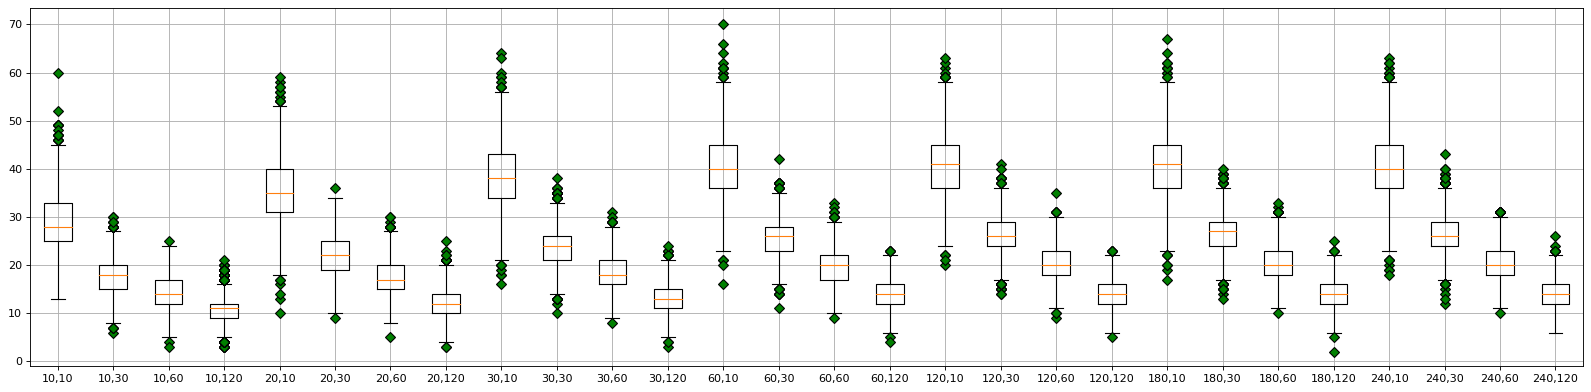

In [16]:
saveFigure = True
simple_boxplot(completed_task_dict, "completedTaskMean_"+results_folder.split("/")[-1], saveFigure)

### MIXED

In [ ]:
saveFigure = True
figName = "completedTaskMean_"+results_folder.split("/")[-1]
print("Figure name: ", figName)
simple_boxplot(completed_task_dict, figName, saveFigure)

### RED

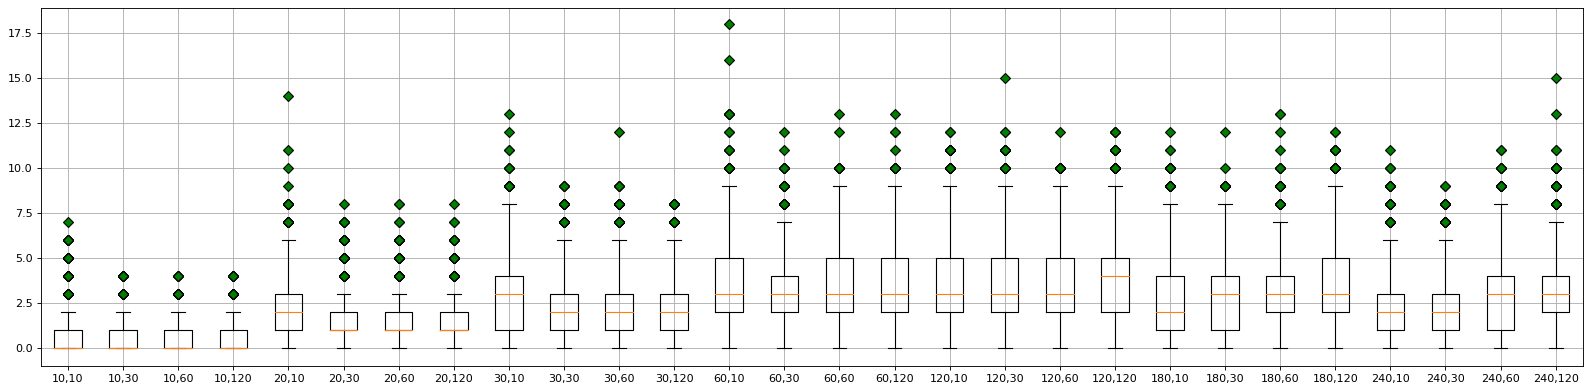

In [9]:
saveFigure = True
simple_boxplot(completed_task_dict, "completedTaskMean_"+results_folder.split("/")[-1], saveFigure)

## Completed areas in general

In [29]:
completed_task_dict = {}

timeout = -1
respawn = -1
for timeout_folder in natsorted(os.listdir(os.path.join(results_folder))):
    print(colored("Timeout folder:", 'blue'),timeout_folder)
    
    parameters = timeout_folder.split("_")
    
    for param in parameters:
        if param.startswith("timeout"):
#             print(param.split("#")[-1])
            timeout = int(param.split("#")[-1]) * 10
            print("\ttimeout:",timeout)
        elif param.startswith("respawn"):
#           print(param.split("#")[-1])
            respawn = int(param.split("#")[-1])
            print("\trespawn:",respawn)
    
#     if timeout == 20 :
#         break
        
    if timeout == -1 :
        print(colored("\tWARNING: wrong timeout folder", 'green'))
        continue
    if respawn == -1 :
        print(colored("\tWARNING: wrong timeout folder", 'green'))
        continue

    completed_task_count = []
    for filename in os.listdir(os.path.join(results_folder, timeout_folder)):
        if filename.endswith("completed_taskLOG.tsv"):
            if not os.path.getsize(os.path.join(results_folder, timeout_folder, filename)) > 0:
                print(colored("\tWARNING, empty file at:" + filename, 'red'))
                completed_task_dict[str(timeout)+","+str(respawn)] = 0
                continue
#             print('\tfilename: ', filename)
            
            df_completedTask = pd.read_csv(os.path.join(results_folder, timeout_folder, filename), sep="\t", header=None)
            completed_task_count += [df_completedTask.shape[0]]
            
    if(len(completed_task_count)!= 100):
        print(colored("\tWARNING, completed_task_count should be 100!", 'red'))
    print(colored("\tlen(completed_task_count)"+str(len(completed_task_count)), 'blue'))
    completed_task_dict[str(timeout)+","+str(respawn)] = completed_task_count
    
            


Timeout folder: TimeoutRespawnExp_2021-07-06_robots#24_timeout#1_respawn#10_NumAreas#16_redAreas#8_1800#seconds
	timeout: 10
	respawn: 10
	len(completed_task_count)100
Timeout folder: TimeoutRespawnExp_2021-07-06_robots#24_timeout#1_respawn#30_NumAreas#16_redAreas#8_1800#seconds
	timeout: 10
	respawn: 30
	len(completed_task_count)100
Timeout folder: TimeoutRespawnExp_2021-07-06_robots#24_timeout#1_respawn#60_NumAreas#16_redAreas#8_1800#seconds
	timeout: 10
	respawn: 60
	len(completed_task_count)100
Timeout folder: TimeoutRespawnExp_2021-07-06_robots#24_timeout#1_respawn#120_NumAreas#16_redAreas#8_1800#seconds
	timeout: 10
	respawn: 120
	len(completed_task_count)100
Timeout folder: TimeoutRespawnExp_2021-07-06_robots#24_timeout#2_respawn#10_NumAreas#16_redAreas#8_1800#seconds
	timeout: 20
	respawn: 10
	len(completed_task_count)100
Timeout folder: TimeoutRespawnExp_2021-07-06_robots#24_timeout#2_respawn#30_NumAreas#16_redAreas#8_1800#seconds
	timeout: 20
	respawn: 30
	len(completed_task_

### Red

completedTask_TimeoutRespawnExp_2021-07-07_robots#24_RED


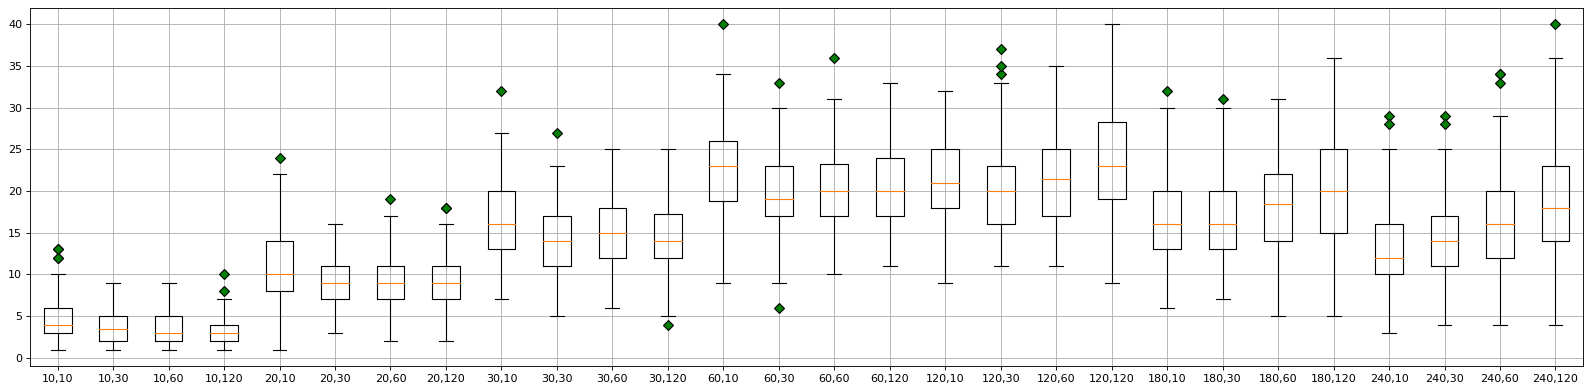

In [11]:
saveFigure = True
figureName = "completedTask_"+results_folder.split("/")[-1]
print(figureName)
simple_boxplot(completed_task_dict, figureName, saveFigure)

### Mixed

completedTask_TimeoutRespawnExp_2021-07-06_robots#24_MIXED


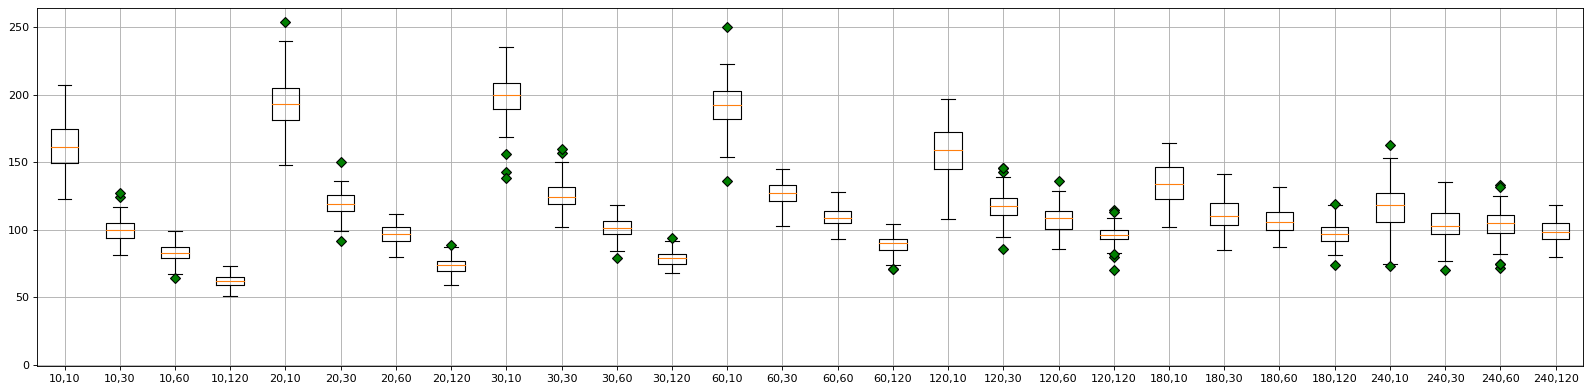

In [31]:
saveFigure = True
figureName = "completedTask_"+results_folder.split("/")[-1]
print(figureName)
simple_boxplot(completed_task_dict, figureName, saveFigure)

### Blue

completedTask_TimeoutRespawnExp_2021-07-07_robots#24_BLUE


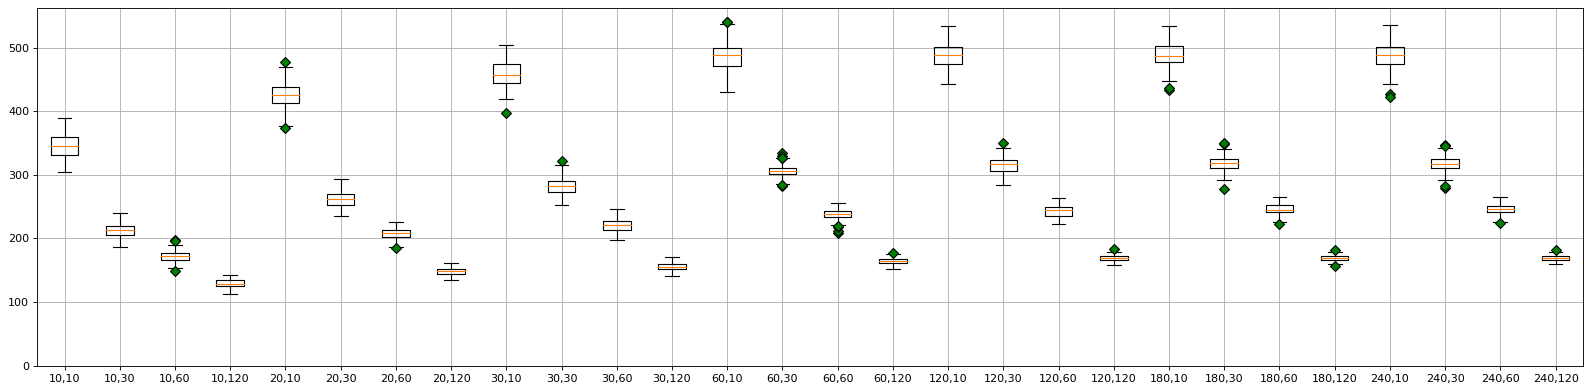

In [25]:
saveFigure = True
figureName = "completedTask_"+results_folder.split("/")[-1]
print(figureName)
simple_boxplot(completed_task_dict, figureName, saveFigure)